# DBTL 7 data analysis

This notebook analyzes OD340 data from DBTL cycle 7 of a flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.metrics import r2_score

import edd_utils as eddu

In [2]:
from art.core import *
# import art.plot as plot

/usr/local/art/.venv/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
pwd

'/code/flaviolin_yield_notebooks_final'

### User parameters

In [4]:
CYCLE = 5

user_params = {
    'output_file_path': f'../flaviolin yield data/DBTL{CYCLE}', # Folder for output files,
    'bounds_file': f'../flaviolin yield data/Putida_media_bounds_extended.csv',
    'study_slug': 'combinatorial-media-optimization-for-flavioli-2378',
    'edd_server': 'edd.jbei.org',
    'username': 'azournas',
    } 

In [5]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [6]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for azournas:  ········


OK! Connection to EDD successful. We will try to load data from EDD...


In [7]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/48 [00:00<?, ?it/s]

In [8]:
df.head()

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,210183,Combinatorial Media Optimization for Flaviolin...,210184,b597d4ab-e821-4e56-8137-0fdfade77799,C5_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,210232,C5_WA1_C1-R1,NaN,OD340,0,NaN,0.6255,48.0
1,210183,Combinatorial Media Optimization for Flaviolin...,210185,097a3a72-78c2-48bb-bbe4-384fb32a2a08,C5_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,210233,C5_WA1_C1-R2,NaN,OD340,0,NaN,0.6214,48.0
2,210183,Combinatorial Media Optimization for Flaviolin...,210186,9078f2c3-83d4-4b35-8c45-8d5cc2dce91d,C5_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,210234,C5_WA1_C1-R3,NaN,OD340,0,NaN,0.6094,48.0
3,210183,Combinatorial Media Optimization for Flaviolin...,210187,c771f157-d5fa-476f-9b16-dab1e8e5157a,C5_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,210235,C5_WD1_F1-R1,NaN,OD340,0,NaN,0.3201,48.0
4,210183,Combinatorial Media Optimization for Flaviolin...,210188,27717520-ceb0-41fe-a34e-06ce4b15bb0a,C5_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,210236,C5_WD1_F1-R2,NaN,OD340,0,NaN,0.3183,48.0


Drop unnecessary columns:

In [9]:
df = df.loc[:,['Line Name','Line Description','Measurement Type','Value']]
df.head()

,Line Name,Line Description,Measurement Type,Value
0,C5_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6255
1,C5_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6214
2,C5_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6094
3,C5_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3201
4,C5_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3183


In [10]:
df

,Line Name,Line Description,Measurement Type,Value
0,C5_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6255
1,C5_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6214
2,C5_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6094
3,C5_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3201
4,C5_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3183
5,C5_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3489
6,C5_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3819
7,C5_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3863
8,C5_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3790
9,C5_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1324


In [11]:
import re
def extract_glucose_concentration(description):
    match = re.search(r"Glucose\[mM\]: (\d+\.\d+)", description)
    return float(match.group(1)) if match else None

df['glucose_conc'] = df['Line Description'].apply(extract_glucose_concentration)

# Calculate OD340yield by dividing "Value" by glucose concentration
df['OD340yield'] = df['Value'] / df['glucose_conc']


# df['OD340yield'] = df['Value']/df['Line Description'].str.extract(r'Glucose\[mM\]: (\d+)', expand=False).astype(float)


In [12]:
# df['Line Description'].str.extract(r'Glucose\[mM\]: (\d+)', expand=False).astype(float)


In [13]:
find_col = lambda x: x['Line Name'][5]

def find_row(row):
    line_name = row['Line Name']
    if line_name[4] == 'A':
        if int(line_name[-1]) == 1:
            return "A"
        elif int(line_name[-1]) == 2:
            return "B"
        else:
            return "C"
    else:
        if int(line_name[-1]) == 1:
            return "D"
        elif int(line_name[-1]) == 2:
            return "E"
        else:
            return "F"


In [14]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)


## Coefficient of variation

In [15]:
df_red = df.drop(columns=['Column'])
stats_mean = df_red.groupby(['Measurement Type', 'Line Description'])['Value'].mean().reset_index()
stats_mean.rename(columns={'Value': 'mean'}, inplace=True)
stats_std = df_red.groupby(['Measurement Type', 'Line Description'])['Value'].std().reset_index()
stats_std.rename(columns={'Value': 'std'}, inplace=True)
stats = pd.merge(stats_mean, stats_std, on=['Measurement Type', 'Line Description'])
stats['CV[%]'] = 100 * stats['std'] / stats['mean']
stats.head(16)

,Measurement Type,Line Description,mean,std,CV[%]
0,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.329100,0.017171,5.217534
1,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.229500,0.009789,4.265481
2,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.625767,0.024879,3.975791
3,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.115233,0.005229,4.537824
4,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.347100,0.041722,12.020045
5,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.390533,0.010944,2.802230
6,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.126533,0.008569,6.771924
7,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.352300,0.002211,0.627685
8,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.618767,0.008367,1.352174
9,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.273000,0.020901,7.656203


In [16]:
print("Mean coefficient of variation for OD340:")
np.mean(stats['CV[%]'])

Mean coefficient of variation for OD340:


3.7181975878456233

## Visualization

/tmp/ipykernel_33660/2381843101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df,


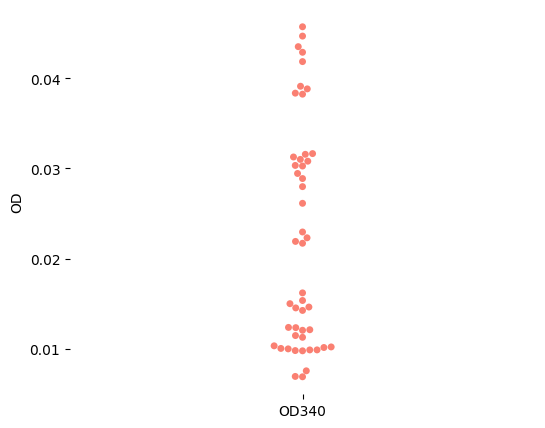

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Measurement Type',
              y='OD340yield',
              palette="dark:salmon_r"
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Per line:

In [18]:
line_names = []
df_340 = df[df['Measurement Type']=='OD340'].reset_index()
for i in range(int(len(df_340)/3)):
    line_names.append(str(df_340['Line Name'][3*i])[3:-3])
# line_names

/tmp/ipykernel_33660/3466474275.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(line_names, fontsize=8, rotation = 30)


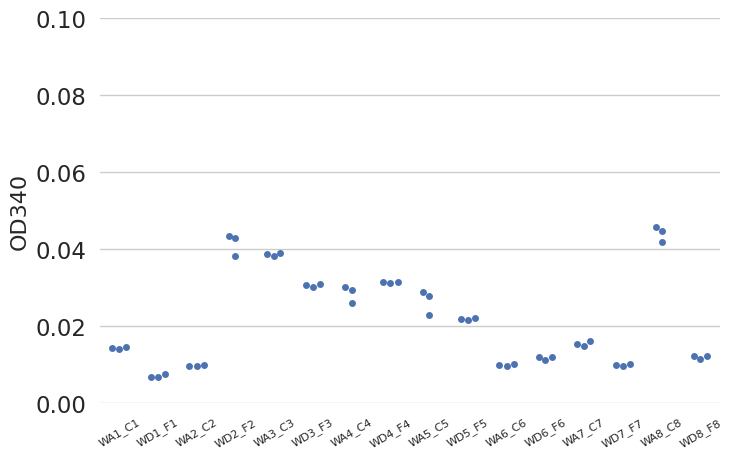

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
fontsize = 14
sns.set_style("whitegrid")
g = sns.swarmplot(data=df, 
              linewidth=0,
              x='Line Description',
              y='OD340yield',
              # hue='Measurement Type',
              # palette="dark:salmon_r",
              )
g.set_xticklabels(line_names, fontsize=8, rotation = 30)
# plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD340", fontsize=fontsize+2)
ax.set_xlabel(None)
plt.ylim([0, 0.1])

fig.savefig(
    f"{user_params['output_file_path']}/swarm_per_design.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [20]:
df[df['Measurement Type']=='OD340']

,Line Name,Line Description,Measurement Type,Value,glucose_conc,OD340yield,Row,Column
0,C5_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6255,42.795319,0.014616,A,1
1,C5_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6214,42.795319,0.014520,B,1
2,C5_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6094,42.795319,0.014240,C,1
3,C5_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3201,46.303341,0.006913,D,1
4,C5_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3183,46.303341,0.006874,E,1
5,C5_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3489,46.303341,0.007535,F,1
6,C5_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3819,38.736065,0.009859,A,2
7,C5_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3863,38.736065,0.009973,B,2
8,C5_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3790,38.736065,0.009784,C,2
9,C5_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1324,3.042005,0.043524,D,2


In [21]:
def get_sample(x):
    return x['Line Name'][:-3]
def get_rep(x):
    return x['Line Name'][-2:]

In [22]:
df['Sample'] = df.apply(get_sample, axis = 1)
df['Replicate'] = df.apply(get_rep, axis = 1)
df.head()

,Line Name,Line Description,Measurement Type,Value,glucose_conc,OD340yield,Row,Column,Sample,Replicate
0,C5_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6255,42.795319,0.014616,A,1,C5_WA1_C1,R1
1,C5_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6214,42.795319,0.014520,B,1,C5_WA1_C1,R2
2,C5_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6094,42.795319,0.014240,C,1,C5_WA1_C1,R3
3,C5_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3201,46.303341,0.006913,D,1,C5_WD1_F1,R1
4,C5_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3183,46.303341,0.006874,E,1,C5_WD1_F1,R2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'C5_WA1_C1'),
  Text(1, 0, 'C5_WA2_C2'),
  Text(2, 0, 'C5_WA3_C3'),
  Text(3, 0, 'C5_WA4_C4'),
  Text(4, 0, 'C5_WA5_C5'),
  Text(5, 0, 'C5_WA6_C6'),
  Text(6, 0, 'C5_WA7_C7'),
  Text(7, 0, 'C5_WA8_C8'),
  Text(8, 0, 'C5_WD1_F1'),
  Text(9, 0, 'C5_WD2_F2'),
  Text(10, 0, 'C5_WD3_F3'),
  Text(11, 0, 'C5_WD4_F4'),
  Text(12, 0, 'C5_WD5_F5'),
  Text(13, 0, 'C5_WD6_F6'),
  Text(14, 0, 'C5_WD7_F7'),
  Text(15, 0, 'C5_WD8_F8')])

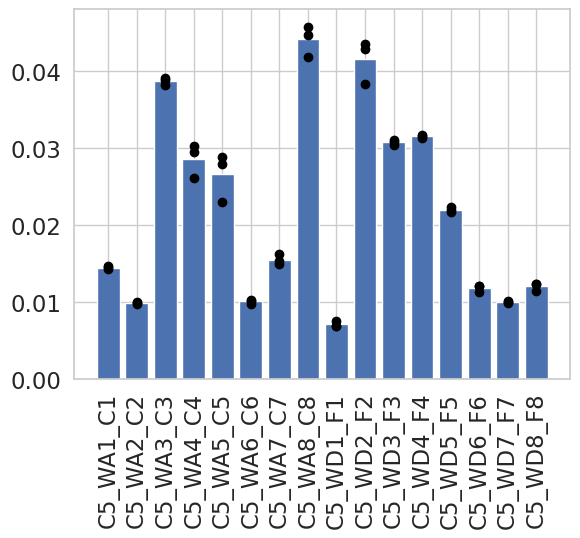

In [23]:
# result = df.groupby('Sample').agg({'Value': ['mean', 'min', 'max', 'std', 'median']}) 
def get_sample(x):
    return x['Line Name'][:-3]
def get_rep(x):
    return x['Line Name'][-2:]

df['Sample'] = df.apply(get_sample, axis = 1)
df['Replicate'] = df.apply(get_rep, axis = 1)
result = df.groupby('Sample')
result['Value'].head()
# result['Value'].plot(kind = 'bar', y = 'mean', yerr = 'std')

result = df[df['Measurement Type']=='OD340'].pivot(index = 'Sample', columns = 'Replicate',values = 'OD340yield')
result['mean'] = result.mean(axis = 1)
result.head()
fig, ax = plt.subplots()
ax.bar(result.index, result['mean'])
ax.scatter(result.index, result.loc[:,['R1']], color = 'black')
ax.scatter(result.index, result.loc[:,['R2']], color = 'black')
ax.scatter(result.index, result.loc[:,['R3']], color = 'black')
plt.xticks(rotation=90)
# result.index
# result[['R1','R2','R3']].values

In [24]:
data_od340yield = df[df['Measurement Type']=='OD340'].pivot(index = 'Row', columns = 'Column',values = 'OD340yield')

In [25]:
data_od340yield.head(6)

Column,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.014616,0.009859,0.038835,0.029445,0.028881,0.009756,0.014990,0.041865
B,0.014520,0.009973,0.039129,0.030273,0.027984,0.010310,0.015341,0.045731
C,0.014240,0.009784,0.038249,0.026132,0.022949,0.010125,0.016189,0.044697
D,0.006913,0.043524,0.030808,0.031571,0.021902,0.011256,0.009857,0.012355
E,0.006874,0.042899,0.030338,0.031651,0.022303,0.012037,0.010022,0.012328
F,0.007535,0.038363,0.031008,0.031276,0.021697,0.012098,0.010187,0.011452


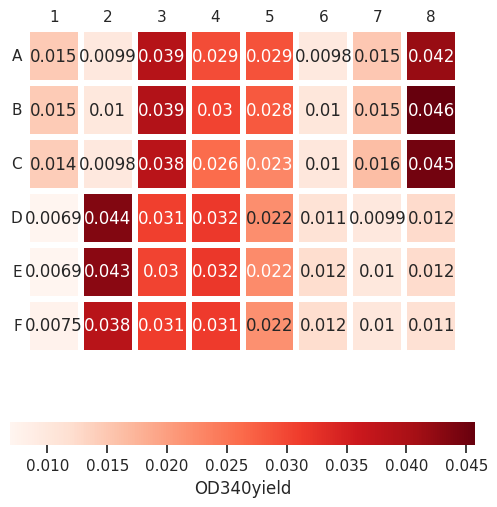

In [26]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340yield, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340yield'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Load training data and predictions for recommendations:

In [27]:
user_params['target_designs'] = f"{user_params['output_file_path']}/target_concentrations.csv"

In [28]:
designs_pred = pd.read_csv(user_params['target_designs'], index_col=0).reset_index()
# designs_pred.drop(columns='Well', inplace=True)
designs_pred['OD340yield'] = df[df['Measurement Type']=='OD340']['OD340yield'].values
designs_pred

,index,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340yield_pred,OD340yield_std,Label,OD340yield
0,0,0.013782,42.795319,0.689979,5.890308,0.080204,8.534230,3.036435,490.645332,0.000141,0.002972,0.000079,0.003381,0.000836,0.015964,0.003946,explore,0.014616
1,1,0.013782,42.795319,0.689979,5.890308,0.080204,8.534230,3.036435,490.645332,0.000141,0.002972,0.000079,0.003381,0.000836,0.015964,0.003946,explore,0.014520
2,2,0.013782,42.795319,0.689979,5.890308,0.080204,8.534230,3.036435,490.645332,0.000141,0.002972,0.000079,0.003381,0.000836,0.015964,0.003946,explore,0.014240
3,3,0.002196,46.303341,1.627894,0.419898,0.072132,8.598819,3.170558,428.803022,0.000243,0.002480,0.000943,0.005789,0.000796,0.016764,0.003945,explore,0.006913
4,4,0.002196,46.303341,1.627894,0.419898,0.072132,8.598819,3.170558,428.803022,0.000243,0.002480,0.000943,0.005789,0.000796,0.016764,0.003945,explore,0.006874
5,5,0.002196,46.303341,1.627894,0.419898,0.072132,8.598819,3.170558,428.803022,0.000243,0.002480,0.000943,0.005789,0.000796,0.016764,0.003945,explore,0.007535
6,6,0.021027,38.736065,0.039389,1.447582,0.060419,11.495846,3.470097,234.071325,0.000257,0.001495,0.000815,0.007781,0.000855,0.012894,0.003934,explore,0.009859
7,7,0.021027,38.736065,0.039389,1.447582,0.060419,11.495846,3.470097,234.071325,0.000257,0.001495,0.000815,0.007781,0.000855,0.012894,0.003934,explore,0.009973
8,8,0.021027,38.736065,0.039389,1.447582,0.060419,11.495846,3.470097,234.071325,0.000257,0.001495,0.000815,0.007781,0.000855,0.012894,0.003934,explore,0.009784
9,9,0.010362,3.042005,1.201076,4.945357,0.096946,7.701755,1.743529,318.415402,0.000233,0.002811,0.000980,0.006352,0.000713,0.041071,0.003798,exploit,0.043524


In [29]:
user_params['train_data'] = f'../flaviolin yield data/DBTL{CYCLE}/train_pred.csv'
user_params['train_data'] 

'../flaviolin yield data/DBTL5/train_pred.csv'

In [30]:
train_pred = pd.read_csv(user_params['train_data'], index_col=0)
train_pred['Label'].unique()

array(['train', 'standard'], dtype=object)

In [31]:
def predictions_vs_observations(
    designs,
    train,
    errorbars_flag=True,
    xlim=None,
    ylim=None,
):
    
    plt.style.use("seaborn-v0_8-white")

    fontsize = 20

    fig, ax = plt.subplots(figsize=(7, 7))
    
    obs_all = np.append(train['OD340yield'], designs['OD340yield'])
    pred_all = np.append(train['OD340yield_cv_pred'], designs['OD340yield_pred'])
    pred_std_all = np.append(train['OD340yield_cv_std'], designs['OD340yield_std'])
   
    print(max(pred_std_all*1.96))
    
    # Plot Scatter Plot
    if errorbars_flag:
        plt.errorbar(
            obs_all,
            pred_all,
            yerr=1.96 * pred_std_all,
            fmt='none',
            ecolor="lightgray",
            elinewidth=1,
            alpha=0.5,
            zorder=0
        )

            
    plt.scatter(
        train['OD340yield'], 
        train['OD340yield_cv_pred'], 
        color="gray",
        label='train'
    )

    # standard = train[train['Label']=='standard']
    # # print('standard')
    # # print(standard)
    # plt.scatter(
    #     standard['OD340'], 
    #     standard['OD340_pred'],
    #     label='standard',
    #     color="k"
    # )
    
    standard_des = designs[designs['Label']=='standard']
    plt.scatter(standard_des['OD340yield'], 
                standard_des['OD340yield_pred'], 
                color="k",
                label = 'standard')
    
    exploit_des = designs[designs['Label']=='exploit']
    # print('exploit')
    # print(exploit_des)
    plt.scatter(
        exploit_des['OD340yield'], 
        exploit_des['OD340yield_pred'], 
        color="r",
        label='exploitation'
    )
    
    explore_des = designs[designs['Label']=='explore']
    # print('explore')
    # print(explore_des)
    plt.scatter(
        explore_des['OD340yield'], 
        explore_des['OD340yield_pred'], 
        color="orange",
        label='exploration'
    )
    
    r2_train = round(r2_score(train['OD340yield'], train['OD340yield_cv_pred']), 2)
    
    r2_all = round(r2_score(obs_all, pred_all), 2)

    ax.set_title(f"$R^2$={r2_train}", fontsize=fontsize)
    
    print(f"$R^2$={r2_all}")
    ax.set_xlabel("Observations", fontsize=fontsize)
    ax.set_ylabel("Cross-validation predictions", fontsize=fontsize)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    if xlim is None:
        ax.set_xlim(lims)
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim(lims)
    else:
        ax.set_ylim(ylim)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # Plot Diagonal Dashed Line
    ax.plot(lims, lims, ls="--", color=".8", zorder=0)
    
    plt.legend(loc='best', 
               fontsize=fontsize-4)

    plt.tick_params(axis="both", which="major", labelsize=fontsize)
    plt.show()

    fig.savefig(
        user_params['output_file_path']
        + "/predictions_vs_observations.png",
        bbox_inches="tight",
        transparent=False,
        dpi=300,
    )

    plt.close(fig)

In [32]:
designs_pred


,index,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340yield_pred,OD340yield_std,Label,OD340yield
0,0,0.013782,42.795319,0.689979,5.890308,0.080204,8.534230,3.036435,490.645332,0.000141,0.002972,0.000079,0.003381,0.000836,0.015964,0.003946,explore,0.014616
1,1,0.013782,42.795319,0.689979,5.890308,0.080204,8.534230,3.036435,490.645332,0.000141,0.002972,0.000079,0.003381,0.000836,0.015964,0.003946,explore,0.014520
2,2,0.013782,42.795319,0.689979,5.890308,0.080204,8.534230,3.036435,490.645332,0.000141,0.002972,0.000079,0.003381,0.000836,0.015964,0.003946,explore,0.014240
3,3,0.002196,46.303341,1.627894,0.419898,0.072132,8.598819,3.170558,428.803022,0.000243,0.002480,0.000943,0.005789,0.000796,0.016764,0.003945,explore,0.006913
4,4,0.002196,46.303341,1.627894,0.419898,0.072132,8.598819,3.170558,428.803022,0.000243,0.002480,0.000943,0.005789,0.000796,0.016764,0.003945,explore,0.006874
5,5,0.002196,46.303341,1.627894,0.419898,0.072132,8.598819,3.170558,428.803022,0.000243,0.002480,0.000943,0.005789,0.000796,0.016764,0.003945,explore,0.007535
6,6,0.021027,38.736065,0.039389,1.447582,0.060419,11.495846,3.470097,234.071325,0.000257,0.001495,0.000815,0.007781,0.000855,0.012894,0.003934,explore,0.009859
7,7,0.021027,38.736065,0.039389,1.447582,0.060419,11.495846,3.470097,234.071325,0.000257,0.001495,0.000815,0.007781,0.000855,0.012894,0.003934,explore,0.009973
8,8,0.021027,38.736065,0.039389,1.447582,0.060419,11.495846,3.470097,234.071325,0.000257,0.001495,0.000815,0.007781,0.000855,0.012894,0.003934,explore,0.009784
9,9,0.010362,3.042005,1.201076,4.945357,0.096946,7.701755,1.743529,318.415402,0.000233,0.002811,0.000980,0.006352,0.000713,0.041071,0.003798,exploit,0.043524


In [33]:
train_pred['OD340yield'] = train_pred['OD340']/train_pred['Glucose[mM]']
train_pred

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],...,OD340,OD340yield,OD340yield_pred,OD340yield_std,OD340yield_cv_pred,OD340yield_cv_std,Label,Unnamed: 21,Unnamed: 22,Unnamed: 23
129,0.011525,163.525376,1.911729,4.397607,0.094752,14.081191,3.334316,494.645336,0.000235,0.002381,...,0.0001,6.115259e-07,0.001152,0.003766,0.002182,0.004139,train,6.120000e-07,NaN,6.115260e-07
130,0.011525,163.525376,1.911729,4.397607,0.094752,14.081191,3.334316,494.645336,0.000235,0.002381,...,0.0001,6.115259e-07,0.001152,0.003766,0.002182,0.004139,train,6.120000e-07,NaN,6.115260e-07
131,0.011525,163.525376,1.911729,4.397607,0.094752,14.081191,3.334316,494.645336,0.000235,0.002381,...,0.0001,6.115259e-07,0.001152,0.003766,0.002182,0.004139,train,6.120000e-07,NaN,6.115260e-07
132,0.035365,125.070509,2.658501,2.043345,0.025682,9.077471,4.940375,463.312797,0.000127,0.000656,...,0.0001,7.995490e-07,0.001239,0.003768,0.004631,0.004515,train,8.000000e-07,NaN,7.995490e-07
133,0.035365,125.070509,2.658501,2.043345,0.025682,9.077471,4.940375,463.312797,0.000127,0.000656,...,0.0001,7.995490e-07,0.001239,0.003768,0.004631,0.004515,train,8.000000e-07,NaN,7.995490e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.019815,2.438664,1.559669,1.496754,0.071106,9.646110,4.720353,499.592575,0.000179,0.000158,...,0.1140,4.674691e-02,0.045712,0.003760,0.036425,0.004427,train,4.674691e-02,NaN,4.674691e-02
106,0.019815,2.438664,1.559669,1.496754,0.071106,9.646110,4.720353,499.592575,0.000179,0.000158,...,0.1140,4.674691e-02,0.045712,0.003760,0.036425,0.004427,train,4.674691e-02,NaN,4.674691e-02
159,0.034935,2.620795,1.899662,0.986370,0.075400,9.461043,4.454125,438.647562,0.000249,0.002729,...,0.1300,4.960327e-02,0.049284,0.003781,0.041161,0.004105,train,4.960327e-02,NaN,4.960327e-02
161,0.034935,2.620795,1.899662,0.986370,0.075400,9.461043,4.454125,438.647562,0.000249,0.002729,...,0.1328,5.067165e-02,0.049284,0.003781,0.041161,0.004105,train,5.067165e-02,NaN,5.067165e-02


0.008950428199999999
$R^2$=0.87


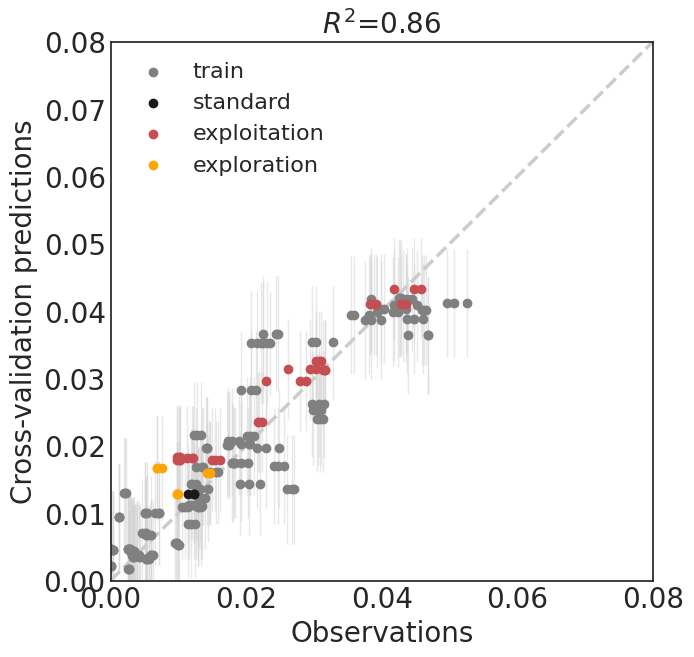

In [34]:
predictions_vs_observations(
    designs=designs_pred,
    train=train_pred,
    errorbars_flag=True,
    xlim=[0, .08],
    ylim=[0, .08],
)